In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,xticks
%matplotlib inline

DATA_DIR = '.'

# Load Data

In [2]:
data = pd.DataFrame()

In [3]:
total_data = [500, 1000, 2500, 5000, 7500, 12389]

for x in total_data:
    data = pd.concat([
     data,   
     pd.read_csv('{}/final_trip_advisor_yelp_XLM_R_result_combined_{}.csv'.format(DATA_DIR, x))
    ])

print(data.shape)
data.head()

(96, 7)


,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
0,A,500,0.25,0,0.492500,0.946667,0.506179
1,B,500,0.25,0,0.377333,0.032889,0.506849
2,C,500,0.25,125,0.629889,0.716444,0.581949
3,C,500,0.50,250,0.569212,0.873778,0.535112
4,C,500,0.75,375,0.634761,0.632889,0.601351


# Plot F1 By Total Data for each Type

In [4]:
# data.loc[(data['tipe'] == 'A') | (data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'A') | (data['tipe'] == 'B')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'A'), 'foreign_mult'] = data[(data['tipe'] == 'A')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'B')].foreign_mult.apply(lambda x: -1)

In [5]:
data = data.sort_values(by=['total_data', 'foreign_mult'])
data.head(20)

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
1,B,500,-1.00,0,0.377333,0.032889,0.506849
0,A,500,0.00,0,0.492500,0.946667,0.506179
2,C,500,0.25,125,0.629889,0.716444,0.581949
3,C,500,0.50,250,0.569212,0.873778,0.535112
4,C,500,0.75,375,0.634761,0.632889,0.601351
5,C,500,1.00,500,0.630036,0.651556,0.591606
6,C,500,1.50,750,0.620024,0.720000,0.572034
7,C,500,2.00,1000,0.623072,0.699556,0.576979
8,C,500,3.00,1500,0.618914,0.762667,0.568212
9,C,500,4.00,2000,0.654136,0.694222,0.611590


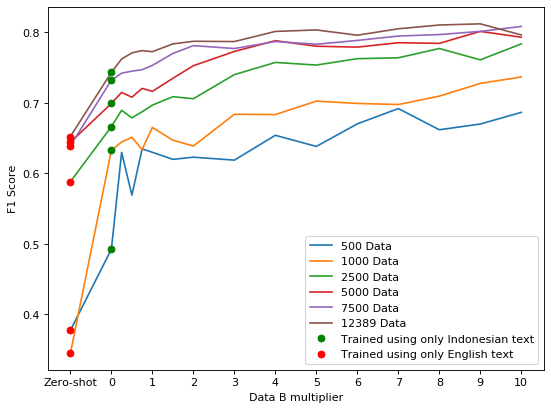

In [6]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 12389]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].max_f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['tipe'] == 'A' )].foreign_mult.values,
data[(data['tipe'] == 'A')].max_f1.values,
'go',
label='Trained using only Indonesian text'.format(x))

plt.plot(data[(data['tipe'] == 'B' )].foreign_mult.values,
data[(data['tipe'] == 'B')].max_f1.values,
'ro',
label='Trained using only English text'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.legend(loc="lower right")
plt.xlabel('Data B multiplier')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()

In [14]:
total_data = [500, 1000, 2500, 5000, 7500, 12389]
diff = 0
for x in total_data:
    cur_diff = data[(data['total_data'] == x) & (data['tipe'] == 'A')].max_f1.values[0] - data[(data['total_data'] == x) & (data['tipe'] == 'B')].max_f1.values[0]
    print("Data {} diff: {}".format(x, cur_diff))
    diff += cur_diff
    
print(diff)
print("Avg: ", diff/len(total_data))

Data 500 diff: 0.11516706795827747
Data 1000 diff: 0.2879306301451159
Data 2500 diff: 0.07822504675485542
Data 5000 diff: 0.055070883159431316
Data 7500 diff: 0.09308368719756788
Data 12389 diff: 0.09109287586949355
0.7205701910847415
Avg:  0.12009503184745692


In [8]:
total_data = [500, 1000, 2500, 5000, 7500, 12389]
gains = 0
for x in total_data:
    gains += max(data[(data['total_data'] == x)].max_f1.values) - data[(data['total_data'] == x) & (data['tipe'] == 'A')].max_f1.values[0]
    
print(gains)
print("Avg: ", gains/len(total_data))

0.6682035676948809
Avg:  0.11136726128248015


In [9]:
max(data.max_f1.values)

0.8122676277488061

In [10]:
data[(data['total_data'] == 12389)]

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
1,B,12389,-1.00,0,0.652412,0.954667,0.587527
0,A,12389,0.00,0,0.743505,0.809778,0.690152
2,C,12389,0.25,3097,0.762448,0.828444,0.708207
3,C,12389,0.50,6194,0.771057,0.847111,0.712790
4,C,12389,0.75,9291,0.774340,0.852444,0.715138
5,C,12389,1.00,12389,0.772726,0.844444,0.715901
6,C,12389,1.50,18583,0.783841,0.856889,0.725904
7,C,12389,2.00,24778,0.787537,0.863111,0.728432
8,C,12389,3.00,37167,0.787141,0.858667,0.729607
9,C,12389,4.00,49556,0.801502,0.884444,0.738679


# Plot all 9 experiment (by total data) side by side

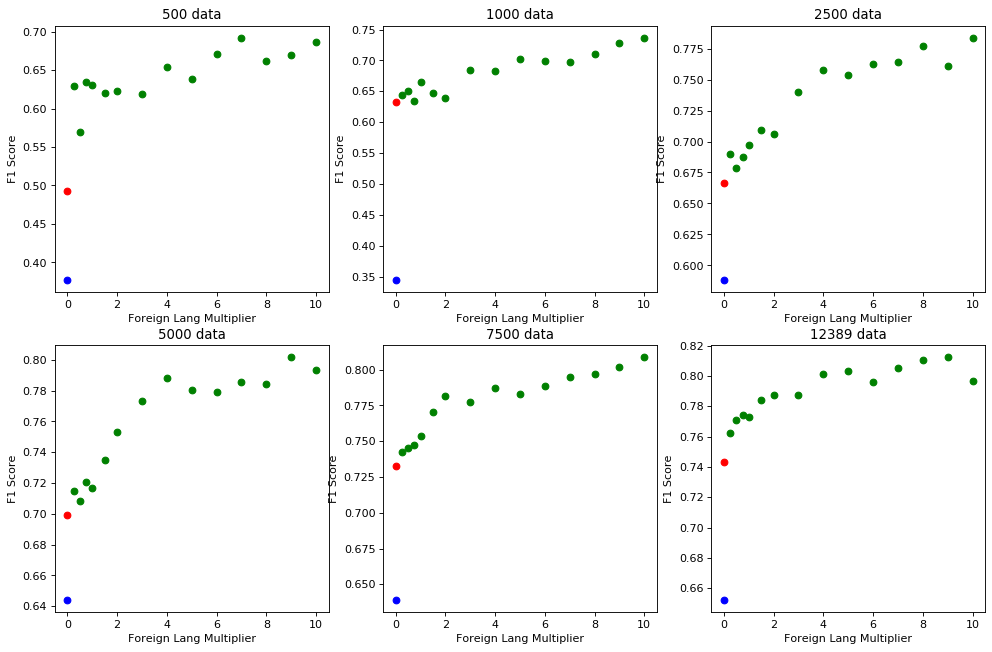

In [11]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
count_plot = 0
for x in total_data:
    count_plot += 1
    plt.subplot(3, 3, count_plot)
    final_result = data[data['total_data'] == x]
    
    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'A'].max_f1.values), 
             final_result[final_result['tipe'] == 'A'].max_f1.values, 'ro', label='A')

    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'B'].max_f1.values), 
             final_result[final_result['tipe'] == 'B'].max_f1.values, 'bo', label='B')

    plt.plot(final_result[final_result['tipe'] == 'C'].foreign_mult.values, 
             final_result[final_result['tipe'] == 'C'].max_f1.values, 'go', label='C')

#     plt.legend(loc="lower right")
    plt.xlabel('Foreign Lang Multiplier')
    plt.ylabel('F1 Score')
    plt.title('{} data'.format(x))

#     plt.figtext(.7, .4, "diff = {:.5f}".format(
#         final_result[final_result['tipe'] == 'C'].f1.values[0]
#         -
#         final_result[final_result['tipe'] == 'A'].f1.values[0]))

plt.show()